[806.13837166  23.70507519  33.71501762]

[[107.84999703   2.84866201  -3.5414283 ]
 [  2.84866201   1.1307465   -0.35611882]
 [ -3.5414283   -0.35611882   0.24315965]]

da = 10.385085316625108, db = 1.0633656468225152, dtau = 0.4931122080775181

The half-life time is 23.3694694059441s
The reduced chi square is: 1.7994434588290864


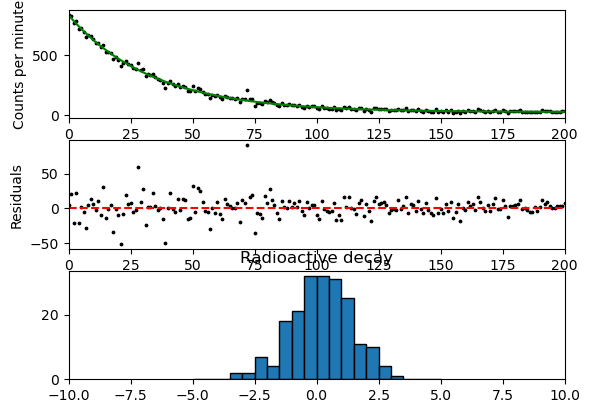

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define opt function 
def Y(t, a, b, tau): 
    return (a * (np.exp(-t / tau)) + b)


# Read Data
data = pd.read_csv("exp_decay.csv")
#print(data)
data_x = np.array(data["time_min"])
data_y = np.array(data["counts_per_min"])
#print(data_x)
#print(data_y)


# Fit curve
p0 =  [800, 1e-3, 20]
bound = ([0, 1e-3, 0], [np.inf, np.inf, np.inf])
sigma = np.sqrt(data_y)

popt, pcov = curve_fit(Y, data_x, data_y, sigma=sigma, p0=p0, bounds=bound)
print(popt)
print()
print(pcov)
print()


# Plot data
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=False)
axs[0].scatter(data_x, data_y, color="k", s=3)
#axs[0].set_xlabel("Time")
axs[0].set_ylabel("Counts per minute")
plt.title("Radioactive decay")


# Plot optimal function
opt = np.array(Y((data_x), popt[0], popt[1], popt[2]))
axs[0].plot(data_x, opt, color="green")
axs[0].set_xlim(0, 200)



# Residuals
residuals = data_y - opt
axs[1].scatter(data_x, residuals, color="k" ,s=3)
axs[1].axhline(0, color="red", linestyle="--")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Residuals")
axs[1].set_xlim(0, 200)



# Standard error
perr = np.sqrt(np.diag(pcov))
da, db, dtau = perr

print(f"da = {da}, db = {db}, dtau = {dtau}")
print()

# Half-life 
time = popt[2] * np.log(2)
print(f"The half-life time is {time}s")


# Histogram
std_res = residuals / np.sqrt(opt)
axs[2].hist(std_res, bins=20, edgecolor="black", range = (-5, 5))
axs[2].set_xlim(-10, 10)

# Reduced chi square 
N, p = data_x.size, 3
chi = np.sum(((data_y - opt) / sigma) ** 2)
red_chi = chi / (N - p)
print(f"The reduced chi square is: {red_chi}")


